### Student Activity: Portfolio Planner Part 2

This program is part 2 of a two-part student activity and continues the following:

`PART I: Portfolio Optimization via Risk Evaluation`

Reads in the CSV datasets of 10 stocks, calculates the volatility of each stock, drops the top-five highly volatile stocks, sets allocations for the remaining stocks based on risk/volatility, and calculates the returns of a hypothetical `$10,000` investment for the constructed portfolio.

`PART II: Portfolio Optimization via Correlation and Return-to-Risk (Sharpe Ratio) Evaluations`

Alternatively filters the same 10 stocks (from part 1) down to only minimally-correlated stocks with higher sharpe ratios, and calculates the returns of a hypothetical `$10,000` investment for the constructed optimized portfolio. Returns of the optimized portfolio are then compared to lesser-optimized portfolios.

---

### PART 1: Portfolio Optimization via Risk Evaluation

In [26]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

### Read CSVs as DataFrames 

In [2]:
# Set the file paths
bk_data = Path("../09-Stu_Portfolio_Planner_Part_II/Resources/bk_data.csv")
fang_data = Path("../09-Stu_Portfolio_Planner_Part_II/Resources/fang_data.csv")
jnj_data = Path("../09-Stu_Portfolio_Planner_Part_II/Resources/jnj_data.csv")
luv_data = Path("../09-Stu_Portfolio_Planner_Part_II/Resources/luv_data.csv")
mu_data = Path("../09-Stu_Portfolio_Planner_Part_II/Resources/mu_data.csv")
nke_data = Path("../09-Stu_Portfolio_Planner_Part_II/Resources/nke_data.csv")
sbux_data = Path("../09-Stu_Portfolio_Planner_Part_II/Resources/sbux_data.csv")
t_data = Path("../09-Stu_Portfolio_Planner_Part_II/Resources/t_data.csv")
wdc_data = Path("../09-Stu_Portfolio_Planner_Part_II/Resources/wdc_data.csv")
wrk_data = Path("../09-Stu_Portfolio_Planner_Part_II/Resources/wrk_data.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
fang_df = pd.read_csv(fang_data, index_col="date", infer_datetime_format=True, parse_dates=True)
jnj_df = pd.read_csv(jnj_data, index_col="date", infer_datetime_format=True, parse_dates=True)
luv_df = pd.read_csv(luv_data, index_col="date", infer_datetime_format=True, parse_dates=True)
mu_df = pd.read_csv(mu_data, index_col="date", infer_datetime_format=True, parse_dates=True)
nke_df = pd.read_csv(nke_data, index_col="date", infer_datetime_format=True, parse_dates=True)
sbux_df = pd.read_csv(sbux_data, index_col="date", infer_datetime_format=True, parse_dates=True)
t_df = pd.read_csv(t_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wdc_df = pd.read_csv(wdc_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wrk_df = pd.read_csv(wrk_data, index_col="date", infer_datetime_format=True, parse_dates=True)

# Display a few rows
wrk_df.head()

/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_48290/4204144139.py:14: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_48290/4204144139.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_48290/4204144139.py:15: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A str

,close
date,
2019-05-20,35.15
2019-05-17,36.66
2019-05-16,37.42
2019-05-15,37.44
2019-05-14,37.19


### Combine DataFrames, Sort Index, and Rename Columns

In [3]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([bk_df, fang_df, jnj_df, luv_df, mu_df, nke_df, sbux_df, t_df, wdc_df, wrk_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names
combined_df.columns = ['BK', 'FANG', 'JNJ', 'LUV', 'MU', 'NKE', 'SBUX', 'T', 'WDC', 'WRK']

# Display a few rows
combined_df.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,43.29,77.96,99.33,34.35,24.06,53.110,53.710,35.78,87.73,58.5699
2015-06-25,42.85,76.39,99.12,34.49,24.02,52.610,54.070,36.18,85.95,57.2022
2015-06-26,42.98,75.25,99.64,34.32,19.66,54.855,54.620,36.12,84.45,57.2022
2015-06-29,41.79,75.16,97.68,33.18,18.73,53.835,53.550,35.77,81.96,56.1857
2015-06-30,41.97,75.38,97.46,33.09,18.84,54.010,53.615,35.52,78.42,56.2781


### Calculate Daily Returns

In [4]:
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020139,-0.002114,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,0.005246,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,-0.002252,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645


### Evaluate Riskiness of Stocks

In [5]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

JNJ     0.161128
T       0.187579
SBUX    0.206805
BK      0.224967
NKE     0.246045
LUV     0.280021
WRK     0.303601
FANG    0.370704
WDC     0.415605
MU      0.479955
dtype: float64

### Drop High Volatility Stocks

In [6]:
# Drop the 5 stocks with the highest volatility in daily returns
daily_returns.drop(columns=['MU', 'WDC', 'FANG', 'WRK', 'LUV'], inplace=True)
daily_returns.head()

,BK,JNJ,NKE,SBUX,T
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.002114,-0.009414,0.006703,0.011179
2015-06-26,0.003034,0.005246,0.042672,0.010172,-0.001658
2015-06-29,-0.027687,-0.019671,-0.018594,-0.019590,-0.009690
2015-06-30,0.004307,-0.002252,0.003251,0.001214,-0.006989


### Set Portfolio Allocations/Weights and Calculate Portfolio Daily Returns

In [7]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to sum the product each weight and the corresponding stock daily return
# BK, JNJ, NKE, SBUX, T
weights = [0.15, 0.05, 0.10, 0.2, 0.50]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

date
2015-06-24         NaN
2015-06-25    0.004358
2015-06-26    0.006190
2015-06-29   -0.015759
2015-06-30   -0.002393
dtype: float64

### Calculate Cumulative Returns

In [8]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

date
2015-06-24         NaN
2015-06-25    1.004358
2015-06-26    1.010575
2015-06-29    0.994650
2015-06-30    0.992269
dtype: float64

### Plot Return of Portfolio Starting with Initial Investment of `$10,000`

<Axes: xlabel='date'>

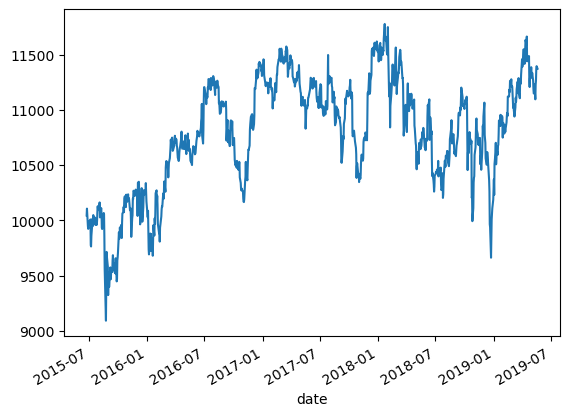

In [9]:
# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

---

### PART 2: Portfolio Optimization via Correlation and Return-to-risk (sharpe ratio) Evaluations

### Reset Daily Returns DataFrame

In [22]:
# Re-calculate daily returns as the DataFrame was modified in part 1
combined_df = combined_df.pct_change()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-26,-1.298488,-0.258962,-3.481437,-2.209357,108.181515,-5.532672,0.517606,-1.148342,-0.139851,-1.000000
2015-06-29,-10.126159,-0.919857,-4.749560,5.739099,-0.739393,-1.435749,-2.925865,4.843023,0.689485,-inf
2015-06-30,-1.155568,-3.447372,-0.885503,-0.918340,-1.124153,-1.174819,-1.061961,-0.278725,0.464879,-1.092545
...,...,...,...,...,...,...,...,...,...,...
2019-05-14,-0.849662,-3.785933,-0.791825,-1.370775,-1.754589,-1.816630,-1.223346,-5.153681,-1.609577,-1.993587
2019-05-15,2.582065,-1.025720,-1.237500,-0.416806,-1.085899,-0.705818,0.833021,-0.747082,-0.494879,-0.773077
2019-05-16,-1.060645,-32.414396,13.434949,0.599959,10.028638,-0.209096,0.613911,1.300660,-1.456323,-1.079466


### Evaluate Correlation of Stock Returns

In [23]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = combined_df.corr()
correlation

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
BK,1.000000,0.006098,-0.053490,-0.003562,0.002493,0.020465,-0.007523,-0.011135,-0.245017,-0.049230
FANG,0.006098,1.000000,0.008218,-0.001314,0.019569,-0.023454,0.011917,-0.002168,-0.007792,-0.006099
JNJ,-0.053490,0.008218,1.000000,0.005733,0.050994,0.007459,0.002725,-0.004791,0.021532,0.009556
LUV,-0.003562,-0.001314,0.005733,1.000000,0.017557,-0.065058,-0.004876,-0.011986,-0.004384,0.008617
MU,0.002493,0.019569,0.050994,0.017557,1.000000,-0.022588,-0.066910,0.004713,-0.103232,-0.014963
NKE,0.020465,-0.023454,0.007459,-0.065058,-0.022588,1.000000,-0.000137,0.014464,-0.004204,-0.014041
SBUX,-0.007523,0.011917,0.002725,-0.004876,-0.066910,-0.000137,1.000000,-0.025124,0.024688,0.028760
T,-0.011135,-0.002168,-0.004791,-0.011986,0.004713,0.014464,-0.025124,1.000000,0.011093,0.010892
WDC,-0.245017,-0.007792,0.021532,-0.004384,-0.103232,-0.004204,0.024688,0.011093,1.000000,0.019396
WRK,-0.049230,-0.006099,0.009556,0.008617,-0.014963,-0.014041,0.028760,0.010892,0.019396,1.000000


<Axes: >

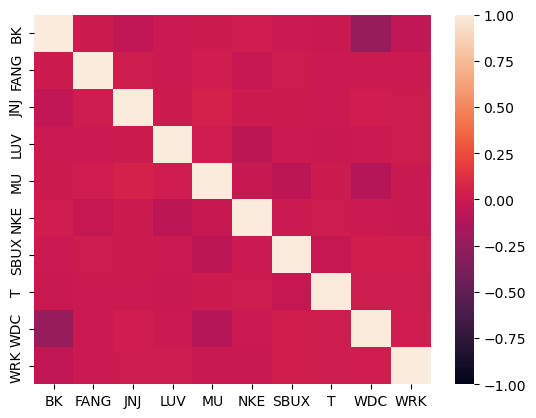

In [29]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(correlation, vmin=-1, vmax =1)

In [30]:
# Alternatively, sum total correlation for each stock
correlation.sum()

BK      0.659098
FANG    1.004975
JNJ     1.047938
LUV     0.940727
MU      0.887633
NKE     0.912907
SBUX    0.963520
T       0.985957
WDC     0.712080
WRK     0.992889
dtype: float64

### Drop the Two Most Consistently Correlated Stocks

In [14]:
# Drop highly correlated stocks and keep only the non-correlated stocks


### Evaluate Reward-to-Risk (Sharpe Ratio) of Minimally-Correlated Stocks

In [15]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio

### Drop the Three Lowest Sharpe Ratio Stocks

In [16]:
# Drop the lowest sharpe ratio stocks and keep only the postive sharpe ratio stocks

### Evaluate Investment in Minimally-Correlated (Diversified) and Return-to-Risk (Sharpe Ratio) Optimized Portfolio

In [17]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio


### Evaluate Investment in Minimally-Correlated (Diversified) Portfolio

In [18]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Uncorrelated Portfolio


### Evaluate Investment in Original/Unoptimized Portfolio (No Modifications)

In [19]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Unoptimized Portfolio


### Overlay Hypothetical Portfolio Investments

In [20]:
# Set the figure of the chart and plot each data trend on the single figure
